# Intro to ML and Time Series


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import patsy
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from pygam import LinearGAM
import warnings
from IPython.display import Image
from IPython.core.display import HTML 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

def plot3D(figsize):
    fig = plt.figure(figsize=figsize)
    ax = fig.gca(projection='3d')

    X = np.arange(-5, 5, 0.25)
    Y = np.arange(-5, 5, 0.25)
    X, Y = np.meshgrid(X, Y)
    R = np.sqrt(X**2 + Y**2 + 2*X*Y)
    Z = np.sin(R)

    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    ax.set_zlim(-1.01, 1.01)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    fig.colorbar(surf, shrink=0.2, aspect=5)
    plt.show()


warnings.filterwarnings("ignore")
plt.style.use("ggplot")

## In Regression problems we want to predict the value of a continous variable "y" by passing matrix "X" into a function that returns accurate predictions about the world around us.

* Linear Regressions are a subset of the Regression family of models that map a linear relationships between your response variable y and covariates or covariate X.

* For Linear Regressions in the form y = mX + b Ordinary Least Squares is a mathematical procedure by which we assure to find the best parameters m and b to explain our data y. This is known as Maximum Likelihood Estimation.




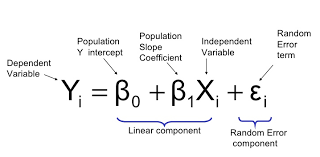

In [50]:
url="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUAAAACdCAMAAADymVHdAAAA/FBMVEX////+/v4AAAD7+/v4+PgjLKa8vNbw8PD8/v/5+fn///309PTs7Ozf39/t7e3p6em0tLTW1tZvb2/i4uK+vr5WVlbFxcWZmZnZ2dkvLy9mZmZtbW23t7fPz8+QkJBPT098fHympqZbW1tISEisrKyVlZUmJiYNDQ13d3c4ODiEhIRBQUFhYWEhISEYGBg2NjZKTrWandwAAKG+xOhpasy3ttc0Nq6Fg8nW1uz59/8ZIrUmKqyZmsvw8v9KTrssM7qRldtWXMZPUaOwr8jCw9Xd4PRub8G0s9w5Qrc0OLRtb8wEFqaoqt3V1O+6veZgZaiFhb2Af80CFqJjY7QTMT7zAAAXdklEQVR4nO1dCYOjxpV+VZAwaoS4DyGKQyA1Akk9djy2J+NxTifejZ11vP//v+wrEGod6O7p7vHyTY/EURcfr95RVCGADh06dOjQoUOHDh06dOjQoUOHDh06dOjQoUOHDh06dOjQoUOHDh0+IxBS/988wvFS7fncQDY+m0MECHQEngtBkqStA0id/Nrp2+s1zdGt7+eBPhz5U2f7mC+1p301WKmYHRJJc/JZ28JGAOo9fgciKP1ARkq9+QAU3DVViyj6a+zNyJEVBN42WQQEVn/LwORnawsb981JDEWoLcEeJ0MIjYLKWposBH8ezoqR9mxNuQg0cSN355hc1t8zSPrP1hA2jYcGAYUF98SWwFZnALY47UOoGR5QUPJna8olIEPkawnOuBAGSV4IsgtqJkZ4wBg4NNMGMLEDsLS5+6l7EHZhYejBPDSnAhI4V6cAkbgA0DRDgQV48aet/1pQK5iH6oOcjFQqarmUgj4SInkM1gjuYW5OCrFkE59E7BMzyOao9SgpmUblSIJoUIQZFV3DmspzLoG68Umrvxo0SRzQJiCm3hzkVI2wpUIEVuEbSKCvpipYruuAa31iAiV+hxxVTZgnsR4wEQKLCWBlKtfEDsj6J6qYSIN9Yy+IzdajK9V2/QSG/MspQLLNCPpzeQaOIdj6XPT8ikDfg0SbVAS2QF77v6JwoH1Cb7v+w7fhSNjxKe+dfj+OpupmLfjthNWWGMJocKQB6OhT/i3Mx1NmLu0HBrN5ZAilPCzGNkxDX1EW4xIKC8KgrQBfaWos2Lqeiof1lpZtNKA4yFJ1/EUCD647AgNUrQ+Sapkg4Z+KIjXQdHBmfUUAPeiBp2qtHknTYDypzKs9eX0AoAePB1oxNs1BYGJeFjMwNQn6qoWGe6CpMFAt7HR9K8lA0nibcNe7Nw+5ly/n5DFblsJQH2pThVErZdYErJCFaulEgTUzI8kdJw/wYCSLlsyPPjMBs1jLTR2FkkYu6gNtVz5Ww1JbyE6UUJ2lTikF1HrwzAfL9oJlNmPmLFsG/Zll64xmqaMvvYP+ORERh/TAp4ROfb8Ag4EV6zF4I8cFx2UFMMcPB2MYy9hJcydSUaPtYTUCcv2gBxJoQa7PVfwwwsBPrBCceJIHRcxvZDJhkGmuHxQ+tigI4eFwfOPNxna0oWifTSR5FwYYmYC9aAIqJzBwnZDZVhaqKwJDJ+rDsiXzKpS7uvKKwFi3FTD0UcYcM0hAiYuQOR5uIYEWEhgWDBFix+AEHqoNr0MQQJQ8Ge0tcWQQJO9ZBJLZnAErclKd3Vtjxxw6pesUluGlhbxUbKmIgwcoVaAtmZFAZskgmldWbptcApnlB1S3bFYq1tCKdL1kY0fjN1KZWQtNmTl+UEsgPRzRMlvRdWItfY2O9MVkoXt0rFzZrIvA/SfkQc88lEE0HMAy1OwKOFmfgcP0HsYRA+5WOa3Z/VG4NL1rnVQmKn3wsHjNk7BiBYJCw9Day3RQTf6nZLoKSsIAW6QqqFcOEqgv4tiQrBxVEUwS0H0lvbJR1wNt76XgbgxzMM70cpeI2cTFaDR2r+862W5cfTb4aAxwKbVcKBwY+Mro6lZci0f3+XxMaM4wzpTvlTAWqefG4sy0ro/br2lCDTazrEBBAoMJsMgzEmV+dSueDYQIIFipaxbYaqA9VKdL9lDE6Q0m8Nqs/SxJEmaiO8nVEKrWQbvOeXLI6w9uxbYCpvVwaf3XBgU5UyMzxtBFmPUigKE3FvqtUUcLetymPtYq1hX3Vts3WvjnQpGg8qvVRVCPOQ4yaIKpZsy+voxetpMXz8Vp/qArBqR5aYk0Lx2Y5+PkzLotrnTzylYSHhBW9Yi+gN9jAeAGB/MZQagq0FoCBwNZ1PtgjUVQsB+opgomd1DYAHqSjmYy3R0fxcuTFBGjACCmBIOIP9ch5tnD0OJQBGmGFfDaFAmZ1BmINu+EpQCe/uzPBa4CG+crbZEl2cKlipuqE39iwNDWXDsuYOpGTKHukFkPbDvr4zOR6lvyL73i2AFXg9KNc6CRNgM7jH0Yzo0cSojzIr6kB79EGFcjb+x9lqEXkWVKDNRhVC6r8E3JfJZE5hjMUvZ3cq6C3o04dyuuIztJ9+GNYCgSZmYR99NnwExtATMRSjEVeRuE8xk093ywZxqbIZC4K7lBAjXQMi/m48yZGEmwwIYlhhVYSCo8SG0Ebn5vcUba024jYgbI9sSyMVIUSohCNoUxgZmUDqo2nH8d4VAXwtzE8CWztNx0J73TeZ4CeFnupCEwyTJk0SyFKGMplBJEWeCrSy9MlHsWJ9JsN2Tj43XzXNogq2cklu1WdkEMN1J67eKQUQ+UB2kyRAkUHuTlwKVAg6DEqHemOekFVhjvhK/JU4gmythl1HHPtWS3w/NWGwoCPwgGUomLxgRNQ5KgQZkE4I0T9E2sfdcqLwbWFHta43tkKL4CBmeokgRMLVQEoHpqi6QRMrf4LGQO0YBYuKVbPQyDBbBAdBPpAgL1GJZxUXq2DHMT5ZldHlY9Mbaarvtt10JAnPKTohfZLkjjeQhlFFI30Qe2nwk+JOO5NzCMFNXZIYF4Kk+FxTA0BU2oCVxwAl/Kgq9GPx+HyHFHVGuncCflajAMZgqk5kgD3wkSmEKh2x64UimVslkOlgKaoPsjjwU2OKyczsa2X0SASlmWxmOueGwTBZ5dZMKfFnXoAZa5OXdjw6HeSCg94BdTSj5mODPy3NESvPuFxwcPxVKf5nmB7PXnnMADY/HO9hmycdsugow+Jd5mkfAAB7WPcKIAAqbjeGsxaYbNmw9gj2PrK010KQRfPnEVeNIOBJNKqSLYAyMA10RHaMklUO/ZKkogDMK+Der8kA7EWl5KVxEIx6H/0Oo+8qterLeAOwZXlA9SfqIXIL1yPk4xgLfHGchzPwQrAFR9nmz7lpCDNva9QYEsQnGIJxIeOPGpQaonhckE9JFLZC0MRTBz/EjcXAUl10pQ80IUMtz16DWjbHyU9YQeWfuB6w/Y6uaPIxPkYJd8MQJR62Dsr0SoqrVCoorlw73q+ECZNYaZOSlRs+u2QB1nDMMrJklVvd/hzJ8U333qOFkDfZOzg2HB7QReaStIRaA+DsoijiQbhMgaFvEQbSBqpBwNozot4lJ9ADzX3tHPqcO9YVAt9s6xpLcSuFb7F2eE0MJGZo5P1GCQQs/WZzDQKgLlFMxZv+zJmojHbBheb9DjGx7M5P1zxPdWCeQjitf5kuEimo1AGBupNVjM0wBG87GL5q4/hHhu48d47gpL6KdgXznGzttlXDvIjr6EcUY8+gQ6cCuWvABE6FVdUxVAtWWu5vpyFTbhX5+P8653yQ1zhesxqutEWBrByaUGNxFYadbCO53waBkIteW54lP54WZ+/bimcng2UIPbCMTCk9Z5X5eVAo0DTzaPbdnA60sHJ7k+v+OeIv9GAiG4dtRli53GHXt0yw4+BroC7uHH2SdAINucndaa5DYdyK7PPuC+vb5+zpMpzRcBjW8/YShdKNf3Ypcdz4sE3tBSNYbrr5QPb/oMBG4qiKBLla2ImVjPVpSfkkJf6F9dWqEezakWNyyF6M2FGy4zCEGeAZv7PoTz3PX0sT+CMJrnEDJpPCqeUATlhX1VO6s8RXrMzbDp5NpWAczFm8RkCZoLlgRDNc+g0HGr7BcJ5E6oGxoY1uO811v1oX5Pr5aTXkmP6VDz+pIhvnZW2AoFG0vgzIrSNBQkkD0Us36hg5aEepTneTXQNqnU4e0GJbh2yQzeveyoGb92DVYdZ950YUqZV5qQKiMFY66hJAxRAknqhXqugatUw01url3yaKG1qW2DqednhqNW5PqHj5l2m2Rg1lxHT8uIXc9VITGdURF6WeG7kHm90WitWlhR3LpG4vBo1Hl5j5J0ZcHVSNHthvKsAgaZkQnQa3hofwx+Rl2HJxkdayCB5hnLRknbT0IOzEE/BqV4Ijdjq+bmWVC1vZVML0I7abgjj8nPr+f6Bq7y7420bjfjskdItvFUbtrmfWyWF5CN8ASaqESllTXs9/ub4ytCfzA4tyolyLyLhyWwZtPK2GDnegV10N9Igq26qNSA2jdolesg6qbMTRel5cbRET1vvB9D4pJyhMKFDdftKl8ub3fie0qDtYVJsNyLBCrJnm8l8hawkSWnrOHAojQ6LycST/18Satbf0F1WAMd5w+UzjaGxbF6BY9Lq26jV614Xnm6EthaE1turpor31dXcQbwGn0+PIo8Zpdc6gAFntdgbckYqaWuuncEREqX0mUK+cXmDW62HOFX/eicjDGlTZbyeMptYGW1jg15ARvmH+OwSnvgxphSdpkAPuVY0xVApZRUVKJYGGc2JaWrMVuNti1ZagcWPWpuFoqwuE2ShOKv11r57HD4Gv/h6VF3Yuw693Rx5uMEYUpXA28unR7LUpSbNp4g8atJhQ6lO74gP/RAgB1Rw3G690QmMNI0vzWGuw1VJ0ZTAHnl2Jx1M5Hr2liTlB6d9mQstgkcNpLr0/H2VWO9BcXC0C7Jh0o0pjsEClFl0ml6tu/1CYCNxWZY/Na3TItt31sRKHpjOjwamO1eck2gqOZ0qe6LzQwt9DEFuFMa4Zo0ttyUN/9FgU71slfS6dkZKgLNckiHk+N+YBuBvfKBLgupRXNxX+aYAtwujXDvMeZb2YEJr88H7MQPtGXtYy8abmLRDLhVBKIdoAv+EPFCAsXKkWZt2gINyPDItInd0gRKtbr2F1//gD2HtjwxEwx7E5G6Ol53YdkMoirb4XLz6fbD9KoLy6aDDlPL0315So9GQsZ2aYQsK+W9Fai+ELATX7IcdG1EuEPY/gIOlUPyp2a10Sj5tRFxd5kntSs45R3hvNL4Q0yMaNxM3c/wzCAg3NPdRQvH0BCIGRe0bLv7Cd1C45kMabMKBWV3t7NingJN2XJ/OUh7aaSOKF/aglQt6VF6yXJQJLDyA2vfo00CPDfhSJfVt9usNxyu71NWmdvNNiiVAkRnarRHYHtplQTSabqzYOoFQLg6nm/uNxuWtoVGhyOBxiqC0ihVmgz7qjyfbovZcCU91YjBo+TwfCJ6gGiRhOHaMuxhuzQCfezB6nrvRbEmkL/B7rE1/KI20Uxu40FLPYCNrti9ytMridUSxuxb4fvVKlatsvq44Tj1GIxfR5SVca/eB6Mku318t7RaipuRcZa84Cs+NwiczzYk0FS20FwREki9eqy2pGWtjMol3X+j2D6BNKhqAYPHclXHDavLRzU3rs3phBs0PJTtPeHcLS3h6oNXadbK5HUQaCqbwyQ7WB3gBE6rga+k7nAezUDI9+fetxBYi7FDa+K0lfvk0Wp0oVICJa00rMSO344qbq6coZDyKS2q/mLu4IYRIaCqp9uBBKIVDS3Nr8NoiKfVU4K9ten7BM6WGH0FaHoWlbjTYspDDz4ivbYFqNr4jmyekmfuvs7cEPPO8IR08EVQnxyVEbFXO/4Za/qQwMSq9WO1oBxmBv8cxrsJ/Z1uOKS5N6zy2dWE3xGDKXeIbEo35lVx4zpA4dztwj7diYVln64fLLxkF8aKFcVcbRpnDNJXfqBshUVS93dSx6SlvZtQVbaLqmJhZ1K4XvPMUOAS2PMe9WulGBVFaiFwu7Sqv3tZOLHqydchfR2vBDD2WNjHYyTCwV97x+eeQrobzexdzzoSqc+tCGx78Mrl8NSTom2JC1/SiGzgcgKhIhBRjk9l3CBwhUoCW7EvgccRHlw/9ry4hkCuA6FNB+6iI7DGHoHxDLgV3n0Ryh5++wSeaUSWWwRyj0wDNIMnFpEQmLUQeGj86nMlcH7JqwmaTBg+zBYnh0Xa5sUJ94fmhV9KIHdjXgOqF9ycSrTtMFT+RJKYp/KRll+kIOxQNtW5ZE0f+j7OK3Bjzp0ZtftI8hW0vPp48WZ06NChQ4cOHV41ttzhuyMJ+bm7u8cUd3fNx/Esh7wRzHoH9d/dTu2PG3d3d0cb9fK4I5wD/oFtJXfHADWBPB2pU5JDGZrCMfEhZw7z4vn3K3rrqqFuQnOv7sh7qOp4Bh6uBm/yx3dvVlwcdV1XHFbXXlNz8NIaHnkC6Z9vWpNwwf+fX+pSV7eD1EQ+Jnr3V6zrdTvUnIdvv/w3VAHd8Vtdn69YbuTs0KVtyuIXv74/kI7AL2+59Ffpq1Lf3DV3p6bxH38B8ub4bX1pVB3km3/99B5OKbRKm627cL19KgvA+z9/+dPhsz9Xt26jNdtc/fzrvzmBJ6p4WeANx1v83Zc/fvH3H96/OYEqw1o8TqV+8/GH33/z9Yf2HlwrAvLLr//5Yo2ffgb44afH/V8+/C+/wQfyvxLUagc+fvf1rx9+dxwfPvzux//8/k3V6T6++8ePeODD8Ty//voWRfuABHFhJuTdV29rfP/27ddf/uHbDx++f/v99/WR7797j4ledQde2YRq5Ojjz78/hXd//suHf+FVffzmyz999cW7k+m/rRTDITeG7Gndb/744z92U92dUs2fGdQvPrz9w9c//vP9E5db6YU3H/70A++0r1zorgXh3ekOfvivP3718bjPfU3hlVH67+8rU/UbJbDpc//817fw5P2qdhq/+wrI3d3r9pxPQVh9rEazm8fk+K8OQNBq/7UyPGtJ2Xr9Bdkd4G4F2Z0IvfKj//ZnWPvzVyzUfg2QfP5ms2qa1Gq9anOt3N9Bn4KbG0DXYn14nXXjCULvxO/Vkr0F8rUh+/ZdFRo1xX1+nZnAoOTvhFNA6vP3pnl8jo2uIKUqn3Ap8CnjigdEkj0wJZBFnadmAoiiwmeXMhl6smkCiy5dvE2qSOT939G7XAW/nxt3K1QEqjbQfOyCEY8yiCZ+CIs0gztzGE4hHM9jiPz5OB6q2dCdDtRFuFDZopg5MJtEunJflE4wPD7VWfZHo3BrNvYduH00UjJ5tE6Wj7jx7THPj4bAKaiR+qCze4ENNBuq5awFA08dAizMsicPIcg0/ntmRQBWzgxgYTDyMluZg1Ps/bTBDqRS7gdDFGmJ61surQLMldWuXP2GCQE3NE1FEIgo8H1+ilz9q0zPhwH/zSQkcAb9SJlpWdYfF5Zd//RhroOsRgC+Z4tiBBr/gQg9zk1QRyxEAjM/ywLPQAL7pwi0AcwZOGPfgNDwffBs/8FUonkBRTwvYpvPL3YTQRQh9A13PpeiuQHu/OR8p5fHYGo5jhnBEPolGTInVyJxkqIE8hm8hjmUUssZQiqKJWiJlio+C+ZK9dt6rDCnppt4I3BiqTy+Xkai0RRJ0gRhKowC/mMcCgxVWwef5Rm5N03OlDu1oznECf/zLcit0P0M9KKYuG6iBqCBrIEZJjJYoRNAUp0MQh2kcCJBIAgaWpMs5i/LtQoLTAaqgxxm0McdB7LjE0OkCNSlDAEqVQHl2jZTGQwvEiHR+K4o87mJbjW7KWcQ60gxWEn48mtInhhJsrVLNreOCssACbJKoESmgqFDpBpWj6q+I87NkU4iWUp5F3alvsoJRE5zTRix4rMjcGduCGneZNIcWb0QZou4va02yHwKZ6FbRhiaiQJhXzLQKksjPwNXIaEo84Xf1tz350riAaaQDd/l358ZNl+WBM3GVqy6PgSrCIRsHj9e9E4h29tkq9rPQPe9WhCyF/d1uAjk5OuqOxxDJ3/tuIAT86LXKf3/QPVSLb4ALFBANJlHLBlM1eoBeIEIyiBQ+fvk8Bjfcucv9DKyVwy+FMmY5OJ9kgYmTYbzJIXc1qaQ2Qm61pG2lK3ISsUizZa9cH7DzwX8RoEEYnStJvx1K+qYO+S2iB5zYaUqhBYPPpTUDaIgdGDkOWGnBVuwBNCTAIM60+evnLXFGD3mIJIhsXIFCqW0mKUWDkZ4HYH7QBVoTBJDWlijTEEJzCAVY98aEje3hrLvQewlc1b2Ywd8nZWDjsAd8DgjCHpgJgxknf/SMfbaLMPI0MlU0GXwJNwywRuALkHw2Y2qfnLsOca4P2KP2yfTd9gFAfnlfoX5t4BOxm5Fx2CHDh06dOjwmeP/AOtRtPFuAXtkAAAAAElFTkSuQmCC"
Image(url=url,width=800)

### Ordinary Least Squares

In [51]:
url="http://cdn-5.analyzemath.com/statistics/regression_formula.gif"
Image(url=url,width=400)

## Minimizing Cost Function


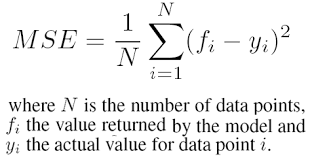

In [52]:
url= "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATYAAACiCAMAAAD84hF6AAAAilBMVEX///8AAAD7+/v5+fn29vbj4+Pw8PDm5ubu7u7r6+va2trf39/z8/OsrKzW1tYsLCzKysq1tbXQ0NBsbGx9fX1nZ2eTk5N2dnaqqqrFxcW8vLyjo6OampqDg4OysrKMjIxUVFRLS0sYGBg5OTkeHh5CQkIyMjJfX18NDQ1OTk4lJSU7OzscHBwUFBR3fqdWAAAdrElEQVR4nO1dCZfirBIFsq9m31c1icb2//+9R5HFaKujTk9Pz/e850yPMZHApSiKAgqE3njjjRF8YicafBBt+kn/29n5V8CpAe4I/cA7fa5yfzs7/w7SDJvsg8f/5Zz8S+ACqfXhA+/97az8S5ADlDJxc+y/nZV/CbGNpC0IWqb97az8S0gFhEqsUNX2t3PyTyGk/wRcIiX92zn5lyAxtrxeVt+0PYE4gb8qTmPrb2flX0Kqsv+6TaD85Zz8JEjVL8ZLmcj+c7D/Dbn5RyBHNb5v+qsVYf9z++w7MvQvQK3deHWfNtcNXYF9stRvydO/ADowP/xC2t64ijdtL+FN20t40/YS3rS9hDdtL+FN20u4ShufZhTBObITku/P5w/DVdrkFmO8dv0zdG3brzFDT74lb7wk/dSZsuuN1KbcfHy+oQtO4e3ovW9xj8dpGnTZz5wru6HbcspNd13r6fYKd99QGDWlMi1+uH/+TS/gBm1iTXkLbvxGzscZwD8Kj7lFC/wjZzAO+LqeEo6Ut/jWr4KTDJCv7YnF+VPFKtTE0Zem/xVQFPUDJ4pyrcmllLbNTc+kN8tAJnxpllRj+iQ48DfBD3bbZUX7sUUjoN3apvKmLoVYqRdSC0Aq2WWxP2BcV4B6jf3nOh6+c32v9N3OuXYX1Ft166dSMWanPGuuTh7m4rXnH4dx7ter2gd/R1C6X1BMkh4L3NSSuDCgtatHaTcoHkISvNI5gG421Vc2GP6D8lb84qE0X15Jjan2vzsvGC7nLIwntGhWLLSxk+z28wVfjzIczMmleM652b2Uz1swgbergjhDqM8qKtxQGf1d40RcqIaoe6L9hOqJCr2IcTnfCfZjNs2NNH7ln/KpfHFnnVHamnuWLQnPpFGnkiabv20K53MzjfInWJNzhOvpwiDlqUNT+ilFaZoQUQ5Ymm9/9UxmR3kL79xX8VlnYj6qvu/D3I2yEUGlqI9KbxKjHo+ftZj4/dxrmXPjVadu2dnVUCMEFIL51WNFbXN/RJCdz2YZ+Et6Vb4eyhFlgqAJ5aN2W6jTlje0b5IiZX3SH+ZxM06EiFN/lWKmgoe58y93ZjgwAr0999Iap89KYXc4Kp6pOc0YKOEu7JycSbg3jH/xp59dhx5C5z8kaAvIOuk5pDe4dRNlqT08zLIe/SGnRHl7kEW1yXbRYSiJsa5s+6aF/Blqpg0dW3besaCENSBtwKMTZloGMhQPWYE+c8EI69xwHZyI+8B5lKZhf9E8eOEC8uPFWYID9ZbfuOlszt4q9uWNB69CpMkypUPq5vyOeVLXjyO2wTZmuiuitVDjpQhLabXaLQoi4G1C4dYX/ZdTnWMfvNjBSXcGWcnhrHVZz42DkgRxzC5ULge/0ivjUFh04TBiYirCyu7STJYtD39MVlsxrDEQnqrnp1BQ2rbXVX3WnDUuYzLyuOAR/mwF2R8gVjFmBq7ozk3+9mD4NkKq7YWVS6jJhoDAk9U9CQzx5obrY9YXWHCtP2pQl9vVVRyvVjIMsq6v/wjOaSs/RnZ5d6Hz4vQMp06ElsZnuj/fMaFVuqlpkhcMGegRkNxQPVxAatlpfCPMdTCPb/V66Oc06FitR19mRcZVRFeHk7QfumGEnNNGuqvDxziNFkiXKQk95Jg0l967V2gD1YZI1coqiC5xP+aupJgJtCdTTt02p6IuB9G6eoEXlOwEA99YNXPeSPnVs4OUhKltbXvp1yMvNNKSSbqPBQPyJLaHmYx8ps2dMlhgd1b1zrJwpnsO//UBhIZvDc7PuwQBj++IowfrKGA2WcJI4otiroMXugRuyGOKB/qWy8rm2oz7KbvhSRCk5s9MV1A1e8sDrrbL4sWjjKSS9aCJWrLnPJA5OSPlPIxz+qfNJXWgKRn5iBYDdewP38XN7FpZzY4Quf4zTnfS9DcdaOJu6eNJh6GVU6CgfyztAmhzMFhthYm62aoq6uckgKS028qh93bAdWamGbXR01E/Giky/CxNPW+oC85OXYwz1j8Fe/y0e1+NLccZ8kfgo3VNoXDu+s44s17qBX/QdBLisXHj+cvEvcwqSiYgEhXW+UXhLfv6BkgcW1YM2edAPWgJXCYjHwJM5DixNaXOWcPTAyznWXs2yeiobyxgRisgv6b+SnxvoXO6cPCRw9TIitWj/Q+xEiUZ3+BW07d684LZ9o1w3F0z6a3qqlBF952OymIEM1gTFPo+R84jy6MlVtPd4ELUqNExshU/6gf/S8jUw+y9vaoZ45tzfiO8oZWSNEXW1E+pdESZP+CLEbudcPLRpRsijGML92dvgCA+NaZHusxrwyHtto+SDNak3rC+1MIH3ZsUkrJ3jEdaqXAoOcQ3Y8VYnWMMilbdf89SiVehZdRCGg3n9Ip/Rmmqm51oPCrFhJGlNZbVzc/q2kP2A8lNYnbGxJGiDfqC93/42mpwKU6G35U2SprVzaYmzSaCwWxwqYxeWN5g5+lnsQx+dn8wTAzH+ADllT/rMOKtb5o0Un0aOBRfu64hvj9V9vdBAh1Eitn25mctnN+c6+OK/o6j/L8O5mqhJgbYXsUn66y4YbPySlrf8ZP/92ExXpQeXCzZpY6JcUXHDWdw4iQtvZpNi/xsE+GPIhgaWg6z15duSO2Idzt8E+vfcEP96xipsvAH0S4canp13N7B8Wcu1fsWCBNVFU7sS+1P7uO78/qDEE9OzwJ34c9cIPsTEUw2hLzB/8eN7lkE82CovDVX8MYFiBit1ElFCb9YxPbGCN07YNy7k7y5X7v89v8b/K2RwFs274B3ry6Q4IT8+N1Z+ZdArjh1EBI9u3x0xdkbS2Rv2l7Bm7Y7MHM2Z6UsMYwl3rTdhhmpw0qD8AR3mHZ403YbkezUN269absNcdgUcA1v2u7BvzWx/qbtDpwOxXTMtdwv3w0+kzdtd1C6CEYJ3BLDnTdtd2DW2dUpeddrsRt+w57vN95444033njjjTfeeOONN95444033njjjTf+j/BoqEwhsZiLmlixlfxqaz7/6iJd8vg27PMF0fq3LgtW8u2Dccuc7MD2yvJFtQ2mzSxFeI10wX9x04+e9vfCuC0hJX512lKjeS/EpoiuZv4hkF/sG15ALzbD3uvkFHQk/BxcSYGgIi8GsSXW3eh3C3BdrHX+LHBcdkYb/1C4T/8i888cFBU/HHklSdJh8W10WkvKf2Itht0b3quxf5VHpc2GffKLdpmc0ZY9tOlIP8+8dT/iJkcIIhyh76R/GW3Tvglyrh8uLm1N27GFj5+DZp1UmbCpqNLxsHArUaaS4MUsH6evhj/SNjwprTks60KNjZqYlK22SJefaOPYbQsXLG3uohF+Tnj8Hq6VQ8fq4YZaFg44Q9YK08Inu5jSZifbnq3DSII9TIhLaSB1lYJiermYpyS5gtyjTNM/7dsmqkd/IAZlOO4p5ku8CgtKm5nhDYgmb5dNPtWqkJZKjl0BqW2voWK74ZAW5VLWV6qe9Y0JtHlWtWZr8oU0PKQE6bGnRptRkZCi9FyD3vPanRtOa3vVPE8DoE0IMi+UkOTjit4UsiwPRx3LO7ltNbiEhJ0y9+EDMT0HybYrFevWQnyAey9FMi2Le7W1phDZITgCQR00UrcYVHhUcqLfCryND3bZSkXJyf4i3IsSgWjSPC92AMUNRAXxDCS6I8Ei7pi05YnZNHBopkGUfjz5C5mrNjAt2NRRwgvrnkNCtw4cadVkplbVOpL6TWnlsIdS6iRi4xSZHQ6Kw7ihoex44kDQO+KttElkzNohSkdpUxr6mOcSkDaIVh4glI/LmZw9rlLHwyEtw0qlj4NYtJQIxcdlolYbCek7yHkYIe76pLayy2FXfwoROoC2aAiorfU8XNGvdi2HdBmCwCSLiAkx/QG/r3i0jIeV0eIrwKU56judbRv1QAkatCRWzcFDo97ROwh162Ke0kbrY09pGwL7hsCiQf9IPajGkJYHYjHwzUZGEeWAHygymW5lyXmrWcHWoDls+qUDGUl7YaDN3KWQ5ijpGgtUR9/Dr+CDCvGUApCfDP5AE+cobUhYQVmuKmYSHkT6igri7o5dgkbpSXDu5e6aZhtu0e89L/e3p+0+TMjSnSUuF3antKgkPM7792faBCiJjYI+97xuPWpovapFyLu8oK0caJOgiNZ4HK5Ds/PR0ewcttp4sDBDwOKlsDgOJ9oEFhYFCk5UDknuTh1oQyqPlHCyhFS2NTXBqTNYDu2RGxgL4AkIuMYDbcQ93oxkk+wslOdYEmHnGKNNpfkse9M0VUEaaStXDlzOzZywAKvCMVeW6QJttBvA7lRBE20a0JYg32eJiue0iZ9pEybaoCdVP0oRF6ppagJB6bx3hvgtZEfCtNGfaCsYrTaTaMfzq/VEGzJzt5q6dHUI1YPDYrAcKlpRV2ij4nYqywWUVa6F0tawIfGZNm+OzM9oC9fnts/YEXgfxnKXBaMNSR5eq1dpq84izT1Km7YNhDkK34m2oS3TsvtLaWOFZ7SRrLFRNktburG56Jw2BUf2sPGropm4RhuUpb2xYCdsywSFNQuoPtM2Zs9UBtrSISSQOZHnDFrOwtXS2gHaIOaifQyv0hb27GmLv6RtB7St0A1pwwlh6SDRWdKWMkmRQE2daLMYD9BI4YUn2mJojek5bRpWzcGgrlfoGm2sLLsbceQc2LqfDGFOZ91mYgg/FGejtAl4Lw2XA8Z4Enx1ZhQCbRJExPNGix1o4ybdltCX0AEMKUb7QYfOknKk0xybiGtwoU9dggStjdL2AVkuWoiXnRBqDghL3aYwLuMdfTifw0LpfSsPjOZAA1QI9A2EmSTBFD5roC2gzZuNDVgwrpE2bdElaKDLXRfxuXflhJpVCqYCi6iVYw/EtRNJjjd56Ev0pTuHBzGgl1P0SyfAo4mRLSN50H4/4xT6drmaLKtVnyRKhVMihrS3IrTjz7t8bKlmv6ZmwoqWkFacEfgYO9KeCgXf0Of1ENLqa4nX4FwF54j9cm8zC2EOLmNgg9dqKkpqg+cO3cB7I6tx40S4K9IQB5qCq8QpcGXAlTnS1qi8Baak2oey6FG1TnOZcXoHr6YGE0EtTmxhFdPKtenj18acMfgZbPgjGrYt6XZRgHj4XUYQnxTFcN89HccTp3Y0DJz1pcpTi8KW+chM83loo/qeIhV2oku2TYWJjzp/zoBDU4bfJByKO09IUoVe2TGSDHiefq9QizXMU9YPCXnlQSmpCj7paNMLwY1ALKOwZ2VhhZVh0h+RtPI04uc8squMR0aVq3yYyyNtecaOgADr3C0NMNVp5kX6VltXaFZFpPmhwEdq6kFZBO/xoBAcd+/yDuRFsKFL4eav73i/6XwQ5877qg/p6sEo03f89Jk/u0KDATInLF8f6Q9ZGsvyxWeo/KNQn9w5nbyXvwKE+rnDPN6xEL4Q3P9xOJfXoZZ5caGpufjRvkM0kz9COmeV5Y8OmKI3Vni4cCpx6c3jCs5BrPpu1NKXwSd48nIT0bpDIJFe0NdEOUvyV/XDXQkWGmM+Odu/H2jQ1zwa1N94IjCF9sRJAfphpI0kuzuHwPLZoxMOy7RTvD8ZNHZ4PSDrDLW7IhrlRWAru1fBmfUnaPOfOBJL3MxzKs3uRlcGod7V9Qsng0mH6kSbUK1+YZaln2gTzMp1ltrJwtgLOBMHepYzQkR7tNQplCAPdFpZuYSUJAjgfkRpM8tAJEnOhhFmls/v4NSYM1IeSbaX6oijI7QyEcpSgmdFapknpEhlzebVPGNvUNN8mAJystQ50VbfoI3f0PYpbF+gTWwWtBG3/QVtxSfaknDt5svpKt5bOyKVNjfI90fKixBaWnWY0rWZFKYB0upEt+iYjdGGXDpIFg89zUpaCvPpbLy9buwaa2poOk2nIGnX6TrzcuhuL5Dko00qnNBxYJl/QCTAIteKNXQEaSdIHl7QRnRTBn+/BdGmpXjwS0k+TmMibHMkjOG2lfg08uJkWi/0klfH74R49JwTx5EH2iTYTnhGmxKzoSQReZro8LgUy/bnRqpcOpTytQaN1BeRAv2CmyybLFmDPz5XaeHpq5p8pM070qt9yyOn4oDEUTrlfmvqlt4xb0yKdBYYH/wdKKftgvRY5WKSgSMenCcahAcHH4gKfgihP9HW2w0+JPAuODrK3A7VbFbYy3hKW9HiCgZBRpb3wSiYarg3y35nK2HLhgRcHmSdD+MoyQ2ysgfa4PnyjLYiL4LKpApzkxgrzMIfG2GWuZ9pS4bD605u2vyoTUeCHRta1CwyAjzH9wePlOpCOE6Oirq/oI3UlLayKaKim7yKpAeSVWxERYn3S9qYh6wHFxubgWDOmqynv/Xpi0MgbKHb9jgTrGbnjB5dzV/khdLbxDwLvZ+E3HQKEDQaHAhciEuF1jD9URgSJNeViLgDzJvsKG22R2jzKxa0WTtaIVUItehbfAReNLum2uRKl5AN4Y2duT8aaYNq2DUQqdqIDHBTDDBpBm1GsZh2MO10RhvxqyKKivEArpG2CKcRJHGPNvDHuo1Bf1uYOggxkhe6DU6fY1P0jJVoqmHmnRPAl6k3HafXDhyxMW22T4cpFWdwIlq7YY4hQik45Khu43l4XsYdWdDWgsJpOdY2WGPjtmC/ftZttBouvljSVtMXnzvTiVuLoQDhYZpIrC+ljW/O9PNAWzg52H9B22HsZ83dJW3QJZC2IYirax75U45G2jwIxF7x2tENw7BzR2MlW9AWjQftUOVKOigv0Gb2PjzviYtGyiE53vTgtTWAthA5rPjGJ9r4DZNq7UTOOW3DbAbSZ2eQjRNQdNlRpURd0Ea4as/EUuAWtGXDhJGoL3VbK32irVsxnhTpAP2DeNmT1huezSVocz2faBPrirfOz/I7p637gAKK20ZqWZ00FZcczUkSTrRlVVotaRscwp9pk9k3sdXMPoEcjnhQB91WI54desmfHE5kC8Xk2g1EHXbHuaJ8J0FYa208ssga5/zIatBt4FxWAn5BW9hTM71vZ9rg/IKUTcM5KRVPaD7tPL040gZpyW14OgHvkrahbPMu8SVtOat9cetLLZyWwmgbn180UqkOeeQuaSuZVfqZNgcyzSf8avbIljgWJAtOyZHwCpqYn8TLE0HDHeSt3VlCsu00nR1bR1WyTHu7o6biY+ZkU4B0Ba8UdrRcaCV+grhdozvEwqVoV3BoGsbQ0XiDm7+gyn1XOhFtgiauVSXAq2mkPNDWMrOm3J1OPTqnTRu6e9W8RlvBugoZB6SDXkWntJk7lqCpnmgrYWLijLbhEILPBkg6HCgXdfO4TKg+MjEIw5hP6R/EB+3uzD3lsEF+3GxdM92VVhiWlPj845BEfkEtkG7dj+efID4Kw1SGeHerY81qrYcDZbK+LWzfkAt6V0FaGAaikIfUglb9bc8iWlBzrjHCYBo3NlBRzjDNIqxPg2WgTVSo3Yb0uuI4H0cil0y32RwXm7GxKAf8/kCbuE3H3gZYVVZfm1yFC5FPqJ0YtuNJmd1ORXq14ihbBZDs0X53q4LoFBcu4OHAAb6zlZPJp3GwAIgMf6joqucOaTI+Re1+jacPwZIdoinjEkZeO6kYmgD7jgjakIQ2TAxILLrdcHdc7sQe5GEGGaCrysILHmJbcdyxwruTbR7jLlMz3MaUng8bqTvcVN00OVXjgBcq7OqSC+tzzJUnWQ3UXYf93N+uM+Ss6fOVguwWjyEzU1znqYdzNcSdxpe4VVG8W3lhh8/O104bmUkBbR/qpe/oJ0FNy2SsbsldzFQkgYZkUdSRCH+QWJQzp7xMv+FkUSaEPsGx1U6jyDhloTvDjFPJNB48NfwqDmKkZxZNVKZmqSjzcNhvoEnny0FD1xhl2kkeWnL492H/ueMWHwZJnj+27m8izpL6/2oOKQ7K4vdPO/Dwx1OHkf4FfG2jpcpD/P0UxS8+lOOrwRf734rBrKvpzebPqcataGMAYububXLMMHz+pL3ydoVZX9fmqSFB7Ie9u1dLIZS3fy8HNw+DBHiZ6G5urm4Xun7pU9Uf6f6Di10Kix+pX3h0BSyrfHguwbw+VSPcOeJLW9+Z3oGY2eSOQHlnZ855jyzdvzivV/JPwseZX3VOChesqVFzNpewtHbJfFA6e7nWuDxHYGWHPi7vGFSYNtFG7/Hwl2VvWLKhHvNhMQg3rQg5vUCPsCWyp65Sp09rshTmg82OgyUunxd+yqF+jRMuxMrvHg4qGFDIs3VD8Qe1onkTB2q3YSNyNfP9eUiWZLnHRlpO5tGRF83Dxo2lulFQUUMtClnggSqZaRO6Q6kj3a14FKd5aJOBNt1rC+T47PBOOoadtBnxGty5NqwF80KDKgvFSCXXG/MXl7ntguvEScsw5ZEFWRXp7wNvXA1FpDQVwpYt4pez0i3ZOtWUZjTOVadrEnYYdjiJhGW/JGxSkYMXplw2Gj5fOzKVti6zQ1AKqq8J7uRjKXaKnsDg36ocEXSGunVpVcNUAg9jZLkJeKnzFrTRMSDYDGVEx4GOrsKYmEkb88eyBZGWK2nz3BEkSoXBai3RoW1ZT3EVdeuhKca1KSc7SpvZJ7qCbViOZ9JB7THh1cH9haQKH0o6POp4JNeprPnUzKPDrBTpOfYyu/swEak+lFF1Oon7i9MCr4JkfAFuofZsPTRzHLHVmTx4fGprXIEOqD5gHXCKRDiVUjpmSFoD7x6sSfQ3Mh01U0kJqEY/0caD95FzJZSDooevGW0WKGO2UPSgDqvBBzCfhQQrFeldOgTftmRcUyUwJ01IGyn4+tCqA2eNNC4tdUfnHI/3CDoBm47P2WUF3Vs0bhYw4aX7j9G1pBQov36Y+H3oCSo9GJA6y5nfk5sS5hJk7JVliFdDO1Fhad66HA8UNuWRtnCijYd5H2+rLWhDwYeKHPoayQL/brikDRZqq/ACF+9np6wDhMFIGXZ+8B9zwaIt5AG6BCWmHG1bNMwDwZVeTdPFeFjum/NHViCfchoPtNljG9ivx1dZKt+8Zj2LK9g5AfMr6twTf/LuSoIkTkqUJK5L3x1sR419QRvNWeCDu3JBGywmYzOqxKK//URbunWWL2C0lcMK3c2KX9Dmbgjb8AJ6ywnD42GkjV7lfjvOexLmEuWb/Si/oEhG2orR+TrTBpl42ghkcFr6tgtJvTeXoPidI6xKlH/coM1oIz3oz2hD1UGGddC8X5vo+Ik25ho8YaSNGcuHllvQBvOJI23exkLgXma0kfKQ6OH+jLbadYajZmAi5jZtL7VRSLXiqMTRBIXTJqBz2qxhBk0YVPamhTZdomhwd2pkSdtBH9yg5XkjpV8GVHlyPmwd2k20xYNuGxfCT564kbbx6Oy2QwvacjYlAbTlW/q6gTYJ/tCsu2e06auUGzzuAZY+0TbpNqSsYu6lkyKzjlB1LCAtruYBz/lcAoc3NEN6wKRLgDXtcJC9eYRZEiel3YLHSiQg0m2tYYtF2Qv0ydPgTOlhj5vETlqHvoWZuw48EOGAiBhmbZRAn2iDrX0b2CWhbAvEnTYs2SxLYSvrdUNz0x/gvQqVrA01VPxq3CPJdJtJ8+Mxlrtu8O4Ouo3lav8x2XXFRldpnXFPb3cVqsSsqM5QOX82pTOcWZqNO4k4+EOhYt6X2X5wbvI7nCTZ1o3pQ5ssdHUkb+o4oQ+6cdphbGU4tCJ/bagFXsRrzmEmT6xxlETbyhIL3GlI36/sosRUqAPcBkE1ukekEAfK0O/xYQ4bmFfqKByci0sr6LEvuThLjE0PE8A0q/TKSvcHWxxoW5lI2VPxUupORslBApvGE0mGc51E2BVp1SbjkjynciIe7ICn3WdCJLggL0o5r06R3dbmE8NQSWxEKu2/637eHBjXTaanbYI4Y98wCUxWPmy+WHVqUZpEzFeuqW1CKSmMea8itY/gr1kfMiVqbd0uDJPWVLUx1DARaVJNPw+S6DDfAMc41fkBNXchH9akisRgU9tppFETehUIySoiYthGSPDbXIhXg1IguMry4fQAuXRzqAKpKAqJt4tC4ZMikpBWzWd6O2xbQXp40qWlljxtPKCmssz8T/j/yAur3Z5GeeCJN2zdzp9bO/1j8R1ntVmFFQzCzTv/jSNTJWo3//m5JM14uhf50VCMvCz+E9rmWwGzrd8gbW+88cYbb7zxxiv4H79kHMZ7dL49AAAAAElFTkSuQmCC"
Image(url=url, width=400)


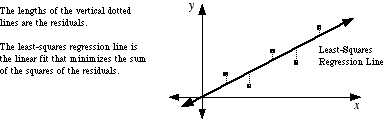

In [53]:
url="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYcAAAB4CAMAAAAuc840AAAAJ1BMVEX///8AAAC7u7sRERGIiIhmZmYzMzN3d3fd3d2qqqpVVVWZmZnMzMy4coStAAAGqklEQVR4nO1bCZbcKAxF1XuS+583SRdowYAXwAhaf+albHb0kUAy7ZzBYDAY2gHAuZfRgzD8I+HLvYZnGDmQH47XN+QBjIdxeLw/vvzj5DzAf4hJpCa0TQsppelTli+VKFwpPvhFDU1NBHz/J4xrPB/IpKVz0o1A/AOZgifx/gjNTM6DFwQwkT6l9JwXPPXF59OqBhBPmAGe1aBkAJwtTAHKqJMeV4cleAiKgc/8x7FcSnMsh9cMbNCr6AQTeM2LeP3EWUxPBIkIUJqQ4oGEv+EBGA+AZYF0LckD1PIAv/FpJR4wAZOYXQEqmtAHagv4z44+OFfHA5vE9Dx480+nJv8EgHPDl1CDtorovOUtPlZyYTMQTdMW1OyYA/MTUUJ0klILWJyHmbyjeUa6NowHHTAedEAhDyf2LDi2FeeaA5k1cjvRxAMQDlc5VqRQDDLPN0MnD8er+AO+E/Ee8qfdNowUvDoMIXEXephOaOLhwkFaxnrQH/PCDR40zwb+TC4yi4IMgSYeLvgzjAe2VwRXWPKAr1hUhCooXDECeng4b5Sc1Af/zsSLSXHAFR9ifRgmEDU8+EjPSRrYlkKBIowDpcJIYm+g4CzGpNwYmQzoMyXsIIGJIhFtoYIHMkc/lYYxPMhe1441HsRwfTAWvjFYH4wFjyFCCJ0aC4iRIRVjgTBMH4wFgVHuo7EgMUYfjIUYg86txkKE2wViLCRxt0iMhTTuFYqxkMOdYjGTlMd9cjEWSrhLMsZCGffIphcL/ENbSGncQ9zhNqlHP13QTxfkl2if5LJvTXrsg/489LVI4S4MvxYQ3sQXa3FTiV1icvwNgOfwv5Kjv5EQF6awYJN5dETvfYEJEm8FsHf62ipuZvBLTI69iRxsGu/WOHlBhDpsNI9uyLCQpSb+ZHqgh+c/eD0pPNF1JACkwOGf+Dh+3ykuRNebijzwy4PV6LpWs7qwSWUCOdnH8x/iD0h8USrXB64p+CaukoEj+Wf0wfGClehouQsWSUyV7HgQRNaSpzpBuw4hIfxPxgVbCDeVeK80BhDjoStONJnowtTONM9Iq76J9FCKwxNWnS2ocKsrZ8nrhrmf33u3LHZe30b6RlKhdVy60o4H45215JWj3C1R3clltOEhmsKurqLBlXYcUBEylnxddNAH9pppHWjtSzu+Z8nXRfP5tdi3Vhd6Am2mjK3EqnGttTNExsGl3LnKReWSpaJfl26uh3I2bfL2oGp8Ftg/J8s6Fwbbxl1INtuoldSxqUnrhX4BdxPfn9hw6DgAtMnwOtIFQB8CtknOJao7arp2DTaT1JAPDOGwlY7+gEPZO8fLCNcFX4k3EElxWZGAnlClm9NIH3KBpELx44MCEmai4DbWgykQy148w0EewEXBqLhLNTyc1oWTRjZblBYnvgsZlng4qg80Vkh1ySoN5iHLQp4dWmkhOOSCBY6COzRI6WpgQ5tYD0V/WATJeyO8DvZKrxugojMXJu5SNHlZnPU8FKSdXSB+criQaHVyeyuWsLD866F2TqU1UNIHrwqk1XgqcXs8LOlb182prIpFuxQ2PmDPKSMtiq+qDXU87B57ctnBvEanc74v+F9gWwiz/OuhYodv4jBArUougqtCaOa2teAS5G+ziiCzeiritaaHOM85iK2leUXIPDfGlaYVsYDRnlTcB2M/wjGDckVWLm4i1o+mEzlfQw8L8dk2ivswN1f4KOWKohHRRM/D2nmTqoeFtDh5qIm8E+GjlCpKX0Y00fNQca5dXSxkljXmSX3g+0GhYkyV1IduRCSbzYhbGwuOm3mXiPt4s4+pPEqUrUjlgPwbHmvqQsVxHhSysIt5xnuYhxCamwkTLZwcD1HGhLowF3LSFemkH0ZGJxwQ7Iwbw3TY1QfJgvHRCTuCNV24CUV92LJgnHRCQbCmCzciqw9pFoyXTsgI1nThZpyJL5k31w+nwnn5C0mGSiS2gPyiN33ohnQ4L1fYeOiFbTjPJD0CXOrGwjiw0JGxMBBB8sbCWPjPCsbCYDw/i+tiQdNY2qLgEqhjYdnjcSZkxzJvHc4+oDjiOQFQmpXO+UJ50DMCJsdo+TXEZkbAz0gaZ7ogCU+ISfmX8DNsUHmsScIT0f0LnKnG+S5LAkNsen/AlDViswEaDyOwPYeo5eEDPl9Gj6EXEgdCtTy494/RI+iF1MFcLw8fq/KQPJbr5eHtbfQI7oRaHh6P98/RY7gRWnl4+ePgxyjEqvGD2WA06IDxoATGgw4YDTpgPCiB8aADRoMOGA9KYDwYqvEXHkQLaLF07hwAAAAASUVORK5CYII="
Image(url=url,width=1400)

## Enough With The Maths... Let's start out with a simple univariate regression using fake data and statsmodels

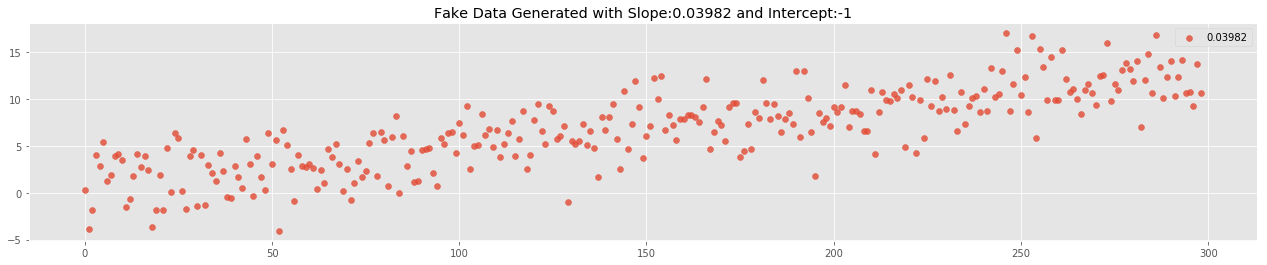

In [54]:
#creates fake linear data
theta, slope, intercept = 2.4, 0.03982, -1

Data = (slope * (np.arange(1,300,1))) - intercept #mx + b
Data = Data + np.random.normal(0,theta,size=len(Data))#add noise

#pretty plot of points
plt.figure(figsize=(22,4))
plt.title("Fake Data Generated with Slope:%s and Intercept:%s"%(slope,intercept))
plt.scatter(range(len(Data)),
            Data,
            alpha=0.8,
            label=slope)
plt.legend()



## We will use OLS to infer parameters of our linear model and plot our models predictions
### Patsy Let's Us Transform Data Into Optimal Format For Stats Models

In [55]:
timesteps = list(range(len(Data)))

data = {"y":Data,
        "x1":timesteps}

y,X = patsy.dmatrices("y ~ x1",data=data) #creates a patsy matrix optimal for regression

results = sm.OLS(y,X).fit().summary() #saves tables into variable

prediction = sm.OLS(y,X).fit().predict(X)#prediction for entire matrix


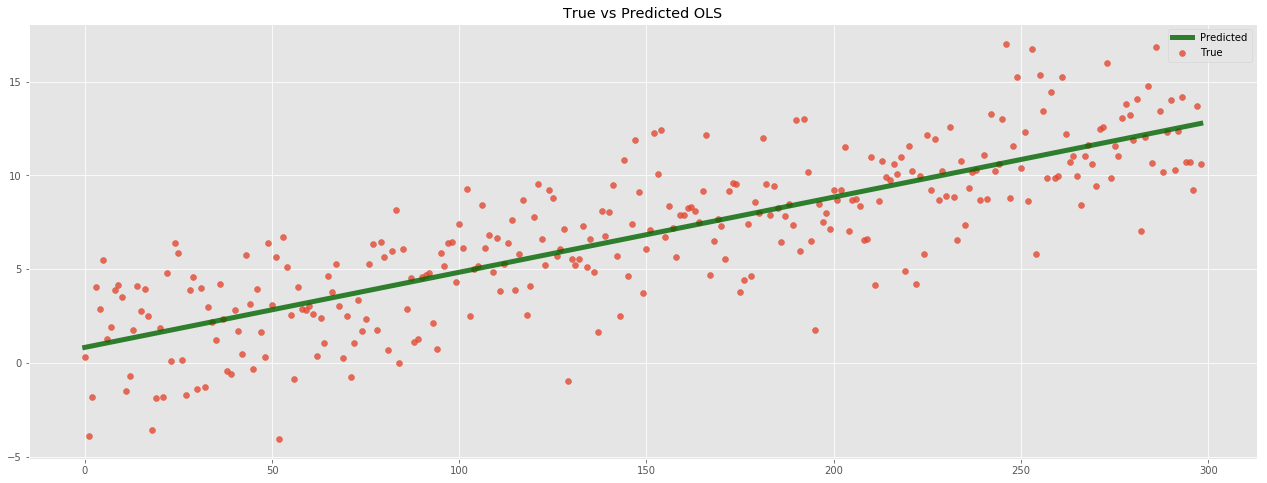

In [56]:
plt.figure(figsize=(22,8))
plt.title("True vs Predicted OLS")
plt.scatter(timesteps,Data,alpha=0.8,label="True")
plt.plot(timesteps,prediction,alpha=0.8,label="Predicted",c="darkgreen",linewidth=5)
plt.legend()


## Let us check out the test statistics and determine the validity of our model. If R2 is higher than 0.5 it means that more than 50% of variance in Y is explained by the linear transformation of X

##### OLS Model Results Are Accessed with the .table[idx]  method

In [57]:
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     610.1
Date:                Tue, 02 Oct 2018   Prob (F-statistic):           5.52e-74
Time:                        19:59:12   Log-Likelihood:                -687.94
No. Observations:                 299   AIC:                             1380.
Df Residuals:                     297   BIC:                             1387.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8245      0.280      2.949      0.003       0.274       1.375
x1             0.0401      0.002     24.700      0.000       0.037       0.043
==============================================================================
Omnibus:                        0.940   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.625   Jarque-Bera (JB):                0.841
Skew:                          -0.130   Prob(JB):                        0.657
Kurtosis:                       3.017   Cond. No.                         344.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Histograms of Residual


RMSE: 2.4154072273497182


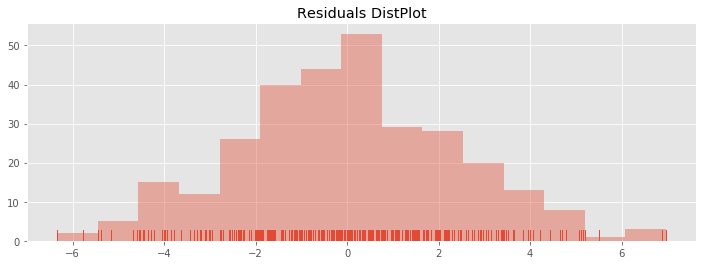

In [58]:
plt.figure(figsize=(12,4));plt.title("Residuals DistPlot")
sns.distplot((prediction - data["y"]),rug=True, kde=False)
print("RMSE: %s"%np.sqrt(mean_squared_error(data["y"], prediction)))


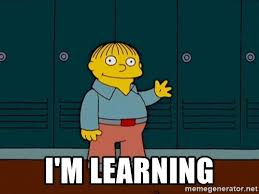

In [59]:
url="data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxAPEhUPEBAWFRUVFRUVFRAVFRUQDxUVFRUXFhUVFRUYHiggGBomGxUVITEhJSkrLi4uFyAzODMtNygtLisBCgoKDg0OGxAQGy0lHSYvLS0uKy0tLS8tKy03LS0tLS0rLS0tLS0tLS0vLS0rLSsrLS0rLS0tKy0tLS0tLSstLf/AABEIAMIBAwMBIgACEQEDEQH/xAAcAAEAAgMBAQEAAAAAAAAAAAAAAQIFBgcEAwj/xABPEAABAwICBAgJCAUMAQUAAAABAAIDBBESIQUTMVEGIkFSYXGRoQcUIzJTgZKx0RUWQmKTorLBQ3J00uEIJDM0NVRzgoOztPDDNlVjlML/xAAaAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUG/8QALhEAAgECBQMEAQIHAAAAAAAAAAECAxEEEiExUQUTQRQiYfAyceEjQqGxwdHx/9oADAMBAAIRAxEAPwDltksiLpPMuLIiIC4REQIrLsP/AHlVlWXYfV7wrJeSv5QiImSEREAEREAVbtPUPzVlQecepv5q6SKkEREyQiIgAiIgCkOz1u95V1WPZ6z71ZJFS3CIiZIREQASyIgZSIZes+8q9lSLZ6z7yrpLYcnqMIRETFcIiIEEREAEREAVl2ese8KyrJs9Y94Vkin+IRETJCIiACIiAKt849TfzVlUbT6vzVkkVIIiJkhERABERAFY/wAz71ZQz8z7ypSRUtwiImSEREAEREAVj2dvvKsqxbB/3lVklsVLclFCJkhERABERABERAFZNnrb7wrKr+TrCskU/wAUEREyQiISgAiRwyyAujYSNgdY8Y3thaNrjcjYtiouBUzh5aXC+4BjYA4hxzEeI5F9syBk0Zk8i56mKpU/yZ008JUnqka2Np9X5qy22PgG0cczSOa4vw4bBxEdwcN/OJs5zRlcMtkSCPFW8DpWDFFMHgNxEOFrsOyVjhtZyHK7eXLNYx6hQbtc2ngau5r6KJg+NxjlYWOBtY7N+R2HfdSu1ST1RxShKLs0EREyQiIgCkWz1u95V1SLZ6z7yrpIqW4RETJCIiACIiAIaMlKpEcgrpDluSiXRMR7KvRxjbrA7E24B4ro3NJ2EtdyHevEshpDShlBbxsy3E5wa02YSWtDWkjaSSb5rHpI1qqKftCIiZkEREAVfydYXro6My3zwgWBdhLySb2a1ozJyJ9S8j+TrC9tBXmEnIkXDgRbE1wBbcA5OBBIINkjaCWlytbROhIuQQ6+FwBF7GzgQcwRuXmXr0hXGbDkbNxHjWxuc43c42yGywAXkQRUy5tCV69BaMNZNgz1bbF4GTnkmzGA8hceXkAJ5F4iuk+DfRZZTufJE5rpXF7JcsmYMDCBe4Ni4i4+kuHqOKWGouZ1YGl3KmpkdHaPEYa9obic7VQWHEbYEOkaOaGtfh6Bfa8rJBjWF7rhoiaWR4ja73NDnvudpN2i/wCtvXvjp2twWHmNwt6BYD/8hfTRsTnASMgZM81Lo5tY4XhhaXBpY0g/RDHW5cd18thXLG1XFO3/AH/X+T26jVONzwGG0MODPA6Ei2eQLWPt/lL185qZzA8sbnG/WRW5WuzljHQeOLdLdyytfTRw1BbEA0PjxyMbk1rw4BjsIyaXAvvvwAr4zE8RocG43sjxnPDiO2xyvyDpIXPVhVo4jsLXX+5UZKUMxr2mOD8Tw+N0eKMtuLDjMbiAc1p5LE42/wCduwrlekKJ9LM+ll85jrB3Obta71jPtXddI0epEro9eNQ2N5kkcHwThxOJjRtDgBa4tmRtXM/CpGBVxvAOcQa51uLfE4sBO+2LsX0GAdfD11Rq2aa3/Q4MWoVaTkvBqKIi+gPECIiAIgaTkBclxAA2klxsAvVNQyMBJwnD5wa4Oczk4w3XyyXw0fPq3sktfA8utvFyCOuxWVqdJR6vVtdjIY6NnEcwhr7AmQu2kDkG05qToUIu9zEIiKjnCIiACIiAJo4XPwsaLudkBsz2r1VFA5jS7Gx4b52Akltza+YzbfK4XnoZzGWPAvh5NlwQQRfkyJWRq9LB0erFzxDGCWavC02vi4xu6zQMrDl6FJ0KMXdsxiJZFRgQiIgQREQAREQBV/J1hWVX8nWFZIp7IIiJklZW3BG8LsHBDhFDVwsY24lYxrZI8J4paLXvswm2S5CvfoDTT6CcVDBiaRhkj57Cdg+sDmP4ry+q4FYqjZfktUd2BxHanZ7M7gvjNStecRuHWtia50biNxLSCQvHDVNrYQ+CRzAXC5LS17S0guY5p2Zix6Lr0Y527WMf0tcYz2Ov718GoTpvR2kvGzPoNGfQQsY1wsA03Lic77y4nM9ZWOZTwPc0QNBbmJMN9UWFpsDyF2LCRyiy9pq3DbBJ6sLx3OUfKDfRy9WrctISqxblq3+oWR9tSTYPkkeAbta95c0EbMuW3Tdab4UIZBTl7Wgsc+LWH6TCwuDHDoOKx3Zb1n9L8IoaRmtljmDbgX1Z2nYMytD4VcNzWxOpoYSyNxGOR5BeQCDhDRkMwM7r1Om0sbVxEarTaXl8HLiJ04QcW7GqIgUF4GV19ufOWJRVc8DabKwTCxWLZ6z7yrKkWz1n3lXSQ5bhERMkIiIAIiIArFsHUrKsewdSsktipbi6IiZIREQAREQAREQBV/J1hWVX8n6wVkinsgiImSFluClCJ6kYrFsQEhbvdezctwOfqCx1HSvnkbDH5zuU7Ggec49AC3uh4NwQC7L60fp7+Uv1bMP1diRpBW1ZmYXvjJdE7CT5wObHdY39IzWQh01ySxlv1meUZ2ecOxYWmq78SSzXXLQfoOINuKT+Hb17V6XG2ZytmTuAXnYvpWGxTzSVnyjppYurS03RnqbSEMpwskaXbcF7P9k5r0rS6aASDWvFnPs5pGUkbR/RgO2gi9z0uKzVNpxrAW1Js4C7X2ylA5ABsk+ry8nR8x1DoVSgs1L3L+qPUw+NjUeWWjNa4fNqao6mN7RGx+UNjjkc1gcXF3IBci3QN657G64BXThBJrH1N+NIbmFxGFrL3DWuGx3KTmCegBatBwWbLLIDLJFx3OEZY2+Am4LTcgi5svrcDQ7FCMLW01/U8vEzVWbd9jXCVvPg+0TDVUVSyRjTrJHNDyBiFo24S08lnG6mj4IUsebw6U//ACHi+yLDtW0aBe1hkgbhaXeUjFsiMDWEAcuEtBI3OC5esyqRwrlDdNF4BQ7tma9JoSLRNC9xi8YqZRq74NYMTgcmi2TQLnpIXP3QPjsyRj2G17Pa5hI3gHau8hj2x4WnE8MsHPvZzgMi4jedtlx3hb494z/P7Y8Pkwy2pwXPmcu3fmuDouNnVnJSaberd9XxZcHVj6MVBNeDCRbPW73lXVIdnrd+Iq6+kR48twiImSEREAEREDKxeaOpWVYtg6lZJDluEREySusH/QVGtHT2FMTub3pidzfvBK5plX1jWjp7CmtbvPYUDnc3vTE7m96LhlX1jWt39x+Ch0osbHPkyO1WxHm94VXlxB4veEgSRZ/J1hHOsdht0C6l3J1/kVDibi245XtuzTAjWdB7CmtG49hU4nc3vVXyOAJw94SuCivrNw4A0fFkqSPOOrZ+q3N3a78K21Y3g7Bq6WFts8AJ63cY+9ZJUthT3PJAwPMzXNBGs2HYfJRm/aVD6Nx4msJjJGJrhifhH0Q/cdhvfJWovOm/xf8AxRr1ISBtoKFIRVYkL4VcZIDmDjsN2jZi3s6iMuux5F90SY0ysMge0ObsIBHURcLA8IeEkEAwNtJKDxWtOTHc5zh5vUM1rXCioqI6iSDWv1eTmMa7C3C8XtlYkXLgsOzLYwjsUP3KzNVHK7nok0tO8431Updv1jxboGa+b6h8ri+SRzzkMT3FzrbrnkvdVD/qnuRhJv17PUojThF6JDlUk07sqHWbfpP4lbWt5wVW3w5bz+JWxHm94VohpEa1vOCa1vOCnEeb3hMR5veEybIjWt5wTWt3hSHHm94QvPNPaEDsiNa3nBSx17/95FBeeae5Swk7RboSuFkUBIYCNwV9YN/vVB5g6h+SuXHm96EDVxrG7/eijEeb3hSmLKLO6Ow/FLO3jsPxVMLed97+KYW87738Uivuxezt47D8VFnbx2H4quFvO+8fipwt5x9o/FAfdibO3jsPxUPxWNyPUM0DRzj7Sh4AF7k9GJDBb/sfR/J1/FQ5tzkbZbr8ql/J1/kVV9r57tt7cqARJa7nfdXyqGuwnjch5FfA3f8AePxVJmNwnPkP0roHHf8AY63SizGD6rfwhfRfGgfiijdvjYfuhfdWtjOW5joa1rHStc12UnnBjnNzjYdrb719xpKD0rR+scB+9ZeQtkEsuFzbEsdhc0naxovcH6qvrZuWNp6n/kQud4iMXZnoRwE5wU0tz1trYTslYf8AO34r4O0xSi/84jy+uCvjrHcsHewrVJtGz4nHUuzc45AEZuJyI61FTFpL26nThOkd2TVR5Uba7T1IP07fVc+4L7HSLPoskd1RuA7XWC06HQ9Q4jydsxm6wAsb5i91tRbO7bI1v6rLntcfyUwxl17tDXE9HVOSVN5jTeF8j3VQJbg8k3IkONsT88tixHG6O9ffScmsnkeJC4YsIc6ziQ3K/VcFfHAed3BdMXdXPIqxyyy8DjdHejAc79GxMLud3BGDM57uhMy8FbXb2/iVuN0d6r9E+v3lWIPO7ggbI431e9LO3jsKYTzj3fBMP1z3fBAhxt47Clnbx2FMP1j3Jh+se0JgTxujvUtB5VXD9Y9oUsyvnfpSAr9EdQ/JXN+jvVHeb6h+Skg87uCBk8bo70UWPO7gpTFYtYblGEblKIsRdkYBuHYmEbh2KUQF2VwDcOxAwbh2KyIC7Kv5Ov8AIqxF1V3J1/kVZA3siMI3BVewW2DZuV0QLMzqXBXRUD6Kmc17mOdGBiY+13gHEMLrgm4dyciyo0G03vPKQNoBYOnMht9i5XojhFU0bRHFhcwSCRrXg8V2YeGkbA5pcD+sSt70PwndOTUxwWjeA10bn8YyMuC8EC1rWb02G5fL4rD4+lOThN5Xfz87Hv4d0a6Voq5NWylGCSlmxmQjEzEZLtDTxyTmwjLoN9iL5U8eFoadoA2bPUvouinFxjZtv5Z69OGWNgpWM0jp2np3YJH8a18IaXGx2XtsXqp6hz7OEZDSL3cRexFxYC61yvcanFuyep6FjOEtY6Gne5nnGzAd2M2v6llFh+FkeKlk6MLvZcCe66cPyVyat+27cGiMgaOQK2rbuCkKV7VkfFuTuU1Tdys1oGwKUCBXZSPZ2+8pqm80dimLZ2+9WQipNpsrq27h2Jq27h2KyIsTdldW3cE1bdwVkQF2V1bdwUhoGwKUQF2Q0ZDqHuUYBuCloyHUFKAb1IwDcFCtdEwuzYBwTm9LH2OKfNOb0sfY9bD8r0394j9tqfK9N/eIvbb8Vnc3yfBr3zTm9LH2PT5py+lj9l62L5Wpv7xH7bfig0rTn9PH7bUXDJ8GvDglL6Znsu+Kj5pzelj7HLZflGD00ftt+K+ba8yzRUtI1s80xfgjbIxosxhe4lxyGQKMwZL+DXTwRmy8tHkdzlPzTm9LH2PW0aTptJUroWT0GF1RIIYgKiJ2KR2wEjzR0lWnotJsnjpHaPtLKx742eMREFsdsZLtgtcJZiu0+DVPmnN6WPscq/NSo9JF9/4Lb9K6P0pSRPqajR2GKMYnubPE9wbcAkNG3araN0XpWpiZUQ6OxRyND2ONRE0lrhdpLTsyRmDtPg013BWcfTj7X/BbBwbp9XTRt2+c4kbDicTcdqrX6QfCaiCpYIZoAMUZka/z2Y24XDbkR2r16Coa6pYW0VHrmQOEDpDNHFx2sYTYO2izhmufEJySSPQ6c40pSlLQ9SLHVekJINcyeAsmhfHG6EPa+7pcOCzxl9MLM/NzTX/to/8AswrjVKb8HsPFUla7NH4RaHknqJHMLR5Nl8RIP0hlYHctn0cfJR/4bPwhYrS5qaaqdTz02CokjhZHCJGPxmSR7GWcMhm7uWxU/BjTLGNZ8mjitDf6zDyCy3nCTgkcVGtTjWnJvRnzXm0jDrIpI+cx7fWWm3evPBXTSSCmZTk1JnkpjBrGgCSIEv8AKHK1htWYPB/TLc/ky/Q2phJ7ysVSnwdksVS2bOd0fB6pexrxq7OAIOM7CLj6K+3zZqt0f2h/dWcmq5NHNfDWU74ZGBz2RPw8dmLiiN4Ja61wDbcsrpal0jRQmqqqDBA3DjkbNHIWh7g0HAMzm4dq9NS0PmZ0vc7I04cGardH9of3UPBmq3R/aH91bc2HSJpflAUH831Rm1mvjxaoDEXYNt7DYr6FpNJV0LaqloMcT8WB7p4mOOFxYbtOzNpTzE9p8GmR8F6sDZH9of3VYcGardH9of3VtmhW19cZW01DjMEhilBnjZhkBILRfzhltVaF9bUVElFDQk1EAJmidLGxrBcAWecnXuDlvSzDdJvwar82ardH7Z/dUHg1Vc1n2n8Fs9bpB9LK+mq4DHOzV4YGObO+Qy+Y2PB5zju6VmoeDWmntxigY0HMMkqGtlt0gAgHounmF2vg58ODNVzYx/qH91Pm1Vc1n2n8FtUukBC90FWw00zbF0UxDTY7HMdfC9uRzB5Fduk6c/p4/bb8UZhOHwah83Kv0bftAh4OVXox9o1bf8pU/po/bb8U+U4PTx+234ouLKuDTfm/V+i++z4qRoCr9F99nxW4/KcHp4/bb8VB0nTjbPH7bfincMi4NR+blX6Nv2jUW3fKlP6eP22/FEswZPg5/hG4KbIi8m7PpLIWSyIi7CyIwDcOxbP4KgBpmiy/vH/GkWtLZvBX/bVF11H/ABpFpRbzoxrpdtnTvDRpAUp0bUu82Kvje42J4rRd2Qz2XXmoOFtLpPT9KaOTWRRUc934Hx+Ue7jNs9oOQaw32cZfP+UH/V6T9od/tOWmeBr+14v8Gf3NXU5WkonEoXg5Hb+GlLr6CshGbnU0waPrGN2D7w7l6eDdKIKSmg9HBEzp4kbW/kvn4wDWvp3Zh9Mx+HeGyPa78Y7VaKrBrZIOZTQyfaSTNH+0rMz86+FwD5Xrshtp/wDjxrq3gNgEdNVxt2NrXgeqCBct8KgvpmuHTT/8aNdJ/k+f1Go/bH9P6GFZxfvaNpr+HFml8PWu+UK8hww+NUV22uTxYNhvku18NNLS0VDUVcLWukiZia14LmE3AsQ0gnbyFcJ8Idc5ulqyANBa+ppCXXzBayAjLl2Lv3CPTDKGmlq5Guc2JuJzW2xEXAyvlyq1bwZu+lzg+ja9+mNNUVTUPhMgljbqoWTRANgbJOHES57RtGWS/QT6tolbD9JzHyDqY5jT3yBcb4JaZj0xwjbWxwvY2KkcQ2TDiBHky7iki3lbLpVRTVB0rFMGHxdtHMx0lxhEr5onBtr32R7kyTmToRFwoEeYvVCUcjSJaJxcQN+JpF+hdK4aaYqKU0IpwDr6+CnlaWl/kZGyGQi2wgNxX5MOeV1pXCujLOFOjprcWSFwv9ZjZwe5zO1b/wAJ+EAoTS4o8YqauKluDhLDMH4X7M7FoFstqANB/lHQsNBC82xNqQGnls6N+IDo4oPqC6NpfRjaykkpX5CaF0ZPKMTLBw6QbH1Llf8AKM0S/UQ1eveWiXVmnJGpBc0kSNAHncUjO+3k5etTVrYWxY8g9zIwdznize11h60AaYIHRcGnxvGFzNHSsc07Q5sLg4doK+3gS/sal/1v9+RZrh80DRdcALfzSo743ErC+BL+xqX/AFv9+RAGM8DH9Lpb9vk/E5Z+m0NqdNyVbRYVNEMR3yQyxtcT/kdF2FYDwMf0ulv2+T8Tl0HRtbHUNMjPoyTRHeHQyuiePaj9yAOaR0jJOFr3OFzHSB7b52dgay/Y8rZOFvCOSk0lo2AzNip5hV6/Hgaw6uJpju93m2duIvdYKi/9VzfsI/8AEsxwxo6Go0jQ01dCJRLDVtiY4Et1jTA8k2OXEa9AGm+Haro6hlJLBPDLI2V7Dq5GSODHsvmGk5XaO3pXKS0bh2LqPhm4KUFBBTSUlKyJzpy1zm3uW6t5tmd4C5euWu/cjuwq9rIwDcOxMA3DsClFhdnTlXBXANw7ApwDcOxSiLsMq4IwjcOxFKIuwsiVCIkMKVCIALYvBrUxxaXo5JXtYwGou97gxgvTyAXcchmQFrqq9gdkQD15q4SyyuRUjmjY694dtKU88FK2GoikIqHEiORkhA1TsyGnYtS8EtXHDpWN8sjI26mYY3uDG3IbYXJstNbC0ZhoB3gAKXxh20A9YutHVWZSMVQag43O/wBdwjpG6bpnCqhLH0U8ZeJWGMO1jJAHOvYHiFX0LwlpHaX0gXVMIY2CijY8ysDH2E0jsLibGxksbbF+e/F2cxvYE8XZzG9gV+oXBl6WXJsvhJqWS6XrJI3te0mCz2OD2G1PGDZwyOYIXQfATpWmgo6hs1RFG41byGySMjcRqYRcBx2ZHPoXHGMDcgAOrJVdC05loJ3kBQqqUnI1lQbgo32Ow+FDRWh3MfpGKaJ1W6amJc2pxXAljYTqw+2TBu5LroOmNIaLrIX009XTujkGF7RUMaSL3tcOuNi/Lni7OY3sCeLR8xvYFfqFwZellyd04KaP0Ro3SczqWeFkfiUIxOqWyAvknlLwHPceSGO4GzLeshXeEGNml4KFk9OaaSBz5JsbSGyDWYRrMWEeYMjv6V+evFmcxvYFPi7NmEdgR6hcB6WXJ3vhhX0b9J6JqmVcBEctQx5E0ZDQ+AlpdnkLsIv0hPCZpqkk+TNXVQuw6Wo3uwysdhYNZdzrHJo37FwTxdnMb2BPF2cxvYE/ULgPSy5Oy+H3S9NPo5jIaiKR3jMZwskY91sEmdmm9lk/CvwkgbozHTVUL5Y5aaRjWyse7FHK1wOFpvkQuDiBg+g3sCgRRg+a299wujvrgPSvk/RvC3hPRVGiap0dVDeWilLY9azWXfCSG4b3xZ2ttWO8DmmqSLRFNHLVQscNddj5Y2PF55CLgm4yXBPF2cxvYENOw/Qb2BL1C4D0suTtPgh0vTRSaUMlTEzHXSOaXSMaHNxO4zbnMdIXo8GXCynE+lKaaoja1tfPNE98jGscyaV9wwk2IBZiy9IuHGnZzG9gWwx6D0eY2YnuxmJjvOi1Ye+GaW1i24AMIaRe/lG7OWlWT2RMsO47s3HS3Cqno+EprDI19O6GOGSVhEjWh7BZ123uA5rb9F10TTw0dJJS6ZlrGBlG2ZzHtex0UgmYGHZcuOWQbmTvXFRwf0dGWgVBcHMjJwPiFy+WGO+bchaR5wm5Aj27V53cHNHYJJRUWLYg9rHGMuxeUzIA4wJY3iixGPacrvufAu0uTfPDppamqKalEFRFIfGMRDJGPcAYn5kA5Lka288EKGORrXyujBE1nOdC0v1ZgzaQLN4sr3YTnZoGWZXlpND0T9WDUkE6vE4uY1jtZC+SzLi7OM1ou69sdrX25VU5M3otQVjWkWys0PRF7Wa8kF0pc8yxRNEcbsIsS08fO+4hjvV9I9C0Ti0a0i2IOdr4GkltQ+N0nH2NbG1r8O1wcLbCVl22bd2Jq6hZtmjaYyxMErjHq2umlxRt4z4y8CNpFx5trG+3k5fWdD0OqdN4ychE4RF8esAfHG8tdlmbve24tYt2FHbYOpE1lSvTpmJkc8scXmNkeGcYS8UE4TjbkcrIpsVmR5UKlEFEIiIEEREhkqERABERABFKIAKERAEqFKIAhERMQK8cx49uS7cuTaERaUyJ7HsRSizLRCIiBhERICraqSUnWSOfhOFuNxfhbuF9g6FYoiqW5MdgilFJRCKUQBClEQB//9k="
Image(url=url,width=400)

# Time Series Regressions:

Time series data are data collected on the same observational
unit at multiple time periods 

* To develop forecasting models 
* To estimate dynamic causal effects 

# Some TSR Considerations

* Time lags
* Correlation over time (serial correlation, a.k.a.autocorrelation)
* Forecasting models built on regression methods:
* autoregressive (AR) models
* autoregressive distributed lag (ADL) models
* need not (typically do not) have a causal interpretation
* Conditions under which dynamic effects can be estimated,and how to estimate them
* Calculation of standard errors when the errors are seriallycorrelated . Cointegration.

## You are now an expert in Linear Regressions
Let's start a consulting firm and take our first client: 

* Richard is Sales Exec for ACMEE Corp and wants us to predict sales for the next 50 days. 

* Hint: We are temporary Gods so we actually know what will happen, but we want to make a model in Python in order not to blow our cover

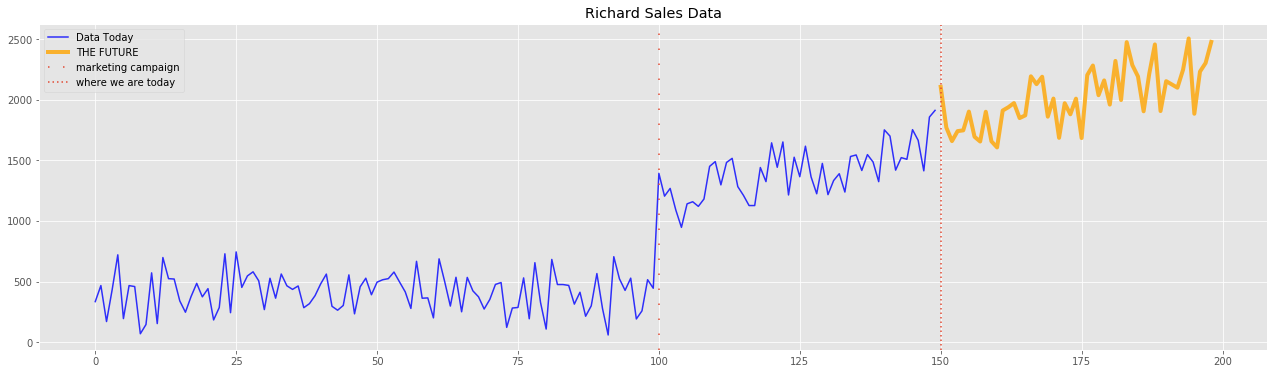

In [60]:
plt.figure(figsize=(22,6))
splineData = np.append(300*np.ones(100)+120, 12*(np.arange(101,200,1))-90) #this is richard
splineData = splineData + np.random.normal(3,150,size=len(splineData))
plt.title("Richard Sales Data")
plt.plot(range(len(splineData))[:150],splineData[:150],alpha=0.8, color="blue", label="Data Today")
plt.plot(range(len(splineData))[150:],splineData[150:],alpha=0.8, color="orange", linewidth=4, label="THE FUTURE")
plt.axvline(100, dashes=[1,9], label="marketing campaign")
plt.axvline(150, dashes=[1,2], label="where we are today")
plt.legend()
plt.show()
data = {"y":splineData,"x1":range(len(splineData))}
y,X = patsy.dmatrices("y ~ x1",data=data)


### No Probem. We are experts at Linear Regression. Let's rock and roll.

In [61]:
results = sm.OLS(y,X).fit().summary()
prediction = sm.OLS(y,X).fit().predict(X)
#results
#print(results.tables[0] )#show results
results#show results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     919.2
Date:                Tue, 02 Oct 2018   Prob (F-statistic):           3.96e-76
Time:                        19:59:14   Log-Likelihood:                -1416.7
No. Observations:                 199   AIC:                             2837.
Df Residuals:                     197   BIC:                             2844.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -55.9650     42.429     -1.319      0.189    -139.638      27.708
x1            11.2387      0.371     30.319      0.000      10.508      11.970
==============================================================================
Omnibus:                       11.435   Durbin-Watson:                   0.671
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.778
Skew:                          -0.580   Prob(JB):                      0.00277
Kurtosis:                       3.275   Cond. No.                         228.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Wow. Our Model Is Amazing.

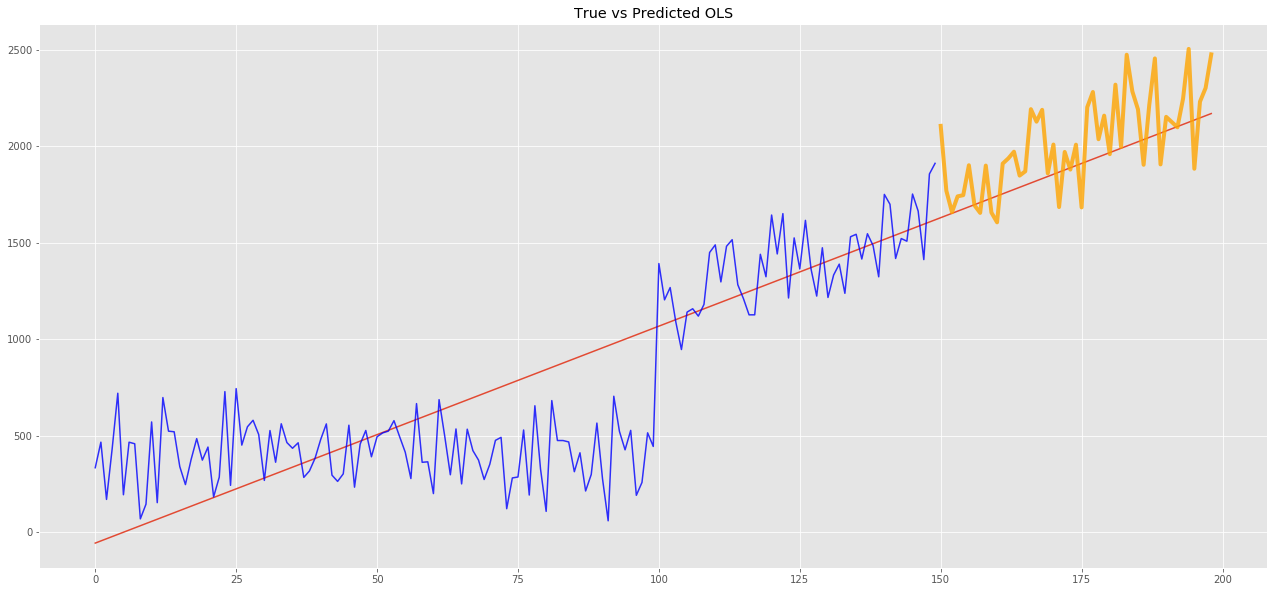

In [62]:
plt.figure(figsize=(22,10))
plt.title("True vs Predicted OLS")
plt.plot(prediction)
plt.plot(range(len(splineData))[:150],splineData[:150],alpha=0.8, color="blue", label="Test Data")
plt.plot(range(len(splineData))[150:],splineData[150:],alpha=0.8, color="orange", linewidth=4, label="Test Data")

RMSE: 298.8800274854768


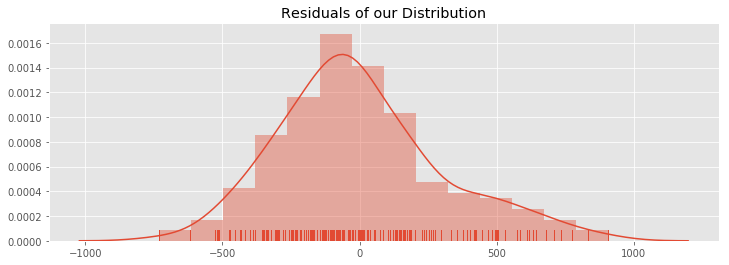

In [63]:
plt.figure(figsize=(12,4))
plt.title("Residuals of our Distribution")
sns.distplot((prediction - data["y"]),rug=True)

print("RMSE: %s"%np.sqrt(mean_squared_error(data["y"], prediction)))

## Oh... maybe it's not that great.


### Never evaluate test statistics in isolation. Always visualize results and ask, does this model make sense?

All Models Are Bad Models! 

However some are not only bad but useless as well. Common sense, logic, and intuition will help distinguish one from another.


"Essentially, all models are wrong, but some are useful."

--- Box, George E. P.; Norman R. Draper (1987). Empirical Model-Building and Response Surfaces, p. 424, Wiley. ISBN 0471810339.


# Statistics to Compare:

* LogLiklihood: The probablity that your model is correct given your data. Only used to compare models.
* AIC Score. Related to the degrees of freedom.
* R2 to interpret variance explained.
* Normalized Coefficients to understand model
* P values to understand the probabilies of "mere chance"
* Error based on prefered error metrics (check full list of here: http://scikit-learn.org/stable/modules/classes.html)

## Machine Learning Methods 

Algorithms that fit our data to by minizing some sort of cost function. There are a great variety of optimization algorthms out there and machine learning is simply about applying these methods to statisical modeling. We minimize our Cost function and therefore maximize probabilities.

# Regularization

Techniques to overcome the overfitting problem of statistical modelling. Different algorithms will have different methods to regularize the model. 

One of the major aspects of training your machine learning model is avoiding overfitting. The model will have a low accuracy if it is overfitting. This happens because your model is trying too hard to capture the noise in your training dataset. By noise we mean the data points that don’t really represent the true properties of your data, but random chance. Learning such data points, makes your model more flexible, at the risk of overfitting.

Some methods are unique to all algorithms such as splitting data into test and training sets.

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Hyper Parameter Tuning

A model hyperparameter is a configuration that is external to the model and whose value cannot be estimated from data.

* They are often used in processes to help estimate model parameters.
* They are often specified by the practitioner.
* They can often be set using heuristics.
* They are often tuned for a given predictive modeling problem.

In [65]:
from sklearn.linear_model import Lasso

RMSE_ = []
alphas = [0.01, 0.1, 1, 50, 100, 500]

for i, alpha in enumerate(alphas):
    print("%s. Hyperparameter = %s"%(i, alpha))
    score= Lasso(alpha=alpha).fit(X_train, y_train).score(X_test, y_test)
    RMSE = np.sqrt(mean_squared_error(y_test, Lasso(alpha=alpha).fit(X_train, y_train).predict(X_test)))
    print("   RMSE: %s"%RMSE)
    print("   R2: %s" %round(score, 5))
    print("")
    RMSE_.append((RMSE))


0. Hyperparameter = 0.01
   RMSE: 309.2249023761455
   R2: 0.79994

1. Hyperparameter = 0.1
   RMSE: 309.22482676749615
   R2: 0.79994

2. Hyperparameter = 1
   RMSE: 309.22407109325746
   R2: 0.79994

3. Hyperparameter = 50
   RMSE: 309.18406029714316
   R2: 0.8

4. Hyperparameter = 100
   RMSE: 309.145524158564
   R2: 0.80005

5. Hyperparameter = 500
   RMSE: 308.920644365743
   R2: 0.80034



# Our Parameter space can become quite complex
* regularization and hyperparameter tuning allows us to ensure convergance to global minimas and minimizes the effects of outliers and noise into our models. The idea behind data science is to model reality not the noise. Hyperparameters used in specific manners can be Regularization in itself.

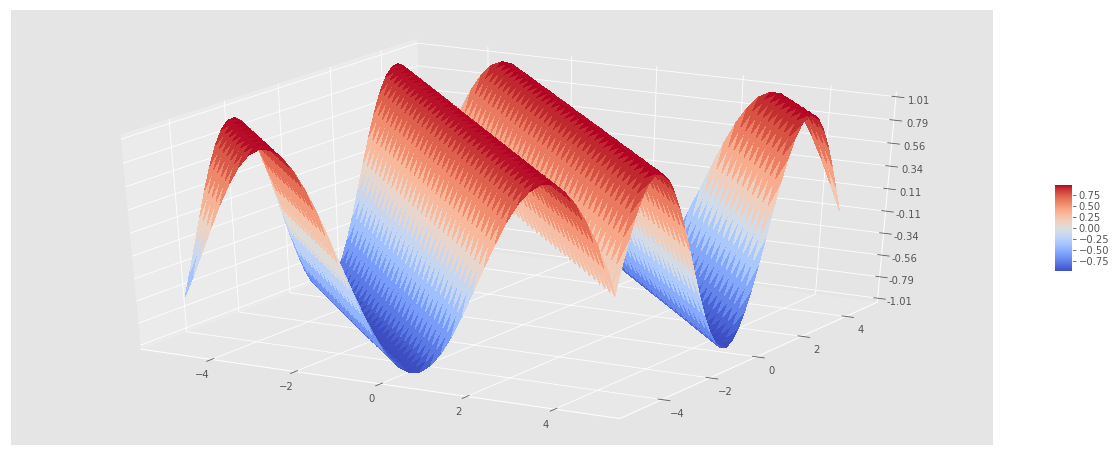

In [66]:
plot3D((22,8))

### How can we fit an accurate model to this non-linear data?

* Regression Trees
* SVR with non linear Kernels
* Generalized Additive Models
* Deep Neural Networks


# Effects of Hyperparameterization on DecisionTree Regressors

In [67]:
def showEffectonTrees():
    plt.figure(figsize=(22,6))
    plt.axvline(150)
    plt.plot(range(len(splineData))[:150],splineData[:150],alpha=0.8, color="blue")
    plt.plot(range(len(splineData))[150:],splineData[150:],alpha=0.8, color="orange", linewidth=4)
    #plt.plot(prediction, label="OLS MODEL", linewidth=4)
    for depth in np.arange(1,12,1):

        treeModel = DecisionTreeRegressor(max_depth=depth)

        treeModel.fit(X[:150,:], y[:150])

        plt.plot(treeModel.predict(X), label="Tree Depth: %s"%depth, alpha=0.8)

        print("RMSE Tree Depth %s: %s"%(depth, 
                                        np.sqrt(mean_squared_error(data["y"][150:],
                                                                   treeModel.predict(X)[150:]))
                                       ))
        plt.legend()

RMSE Tree Depth 1: 658.8610602939
RMSE Tree Depth 2: 496.88311778546375
RMSE Tree Depth 3: 274.48352306616704
RMSE Tree Depth 4: 261.95092563459684
RMSE Tree Depth 5: 261.95092563459684
RMSE Tree Depth 6: 261.95092563459684
RMSE Tree Depth 7: 261.95092563459684
RMSE Tree Depth 8: 261.95092563459684
RMSE Tree Depth 9: 261.95092563459684
RMSE Tree Depth 10: 261.95092563459684
RMSE Tree Depth 11: 261.95092563459684


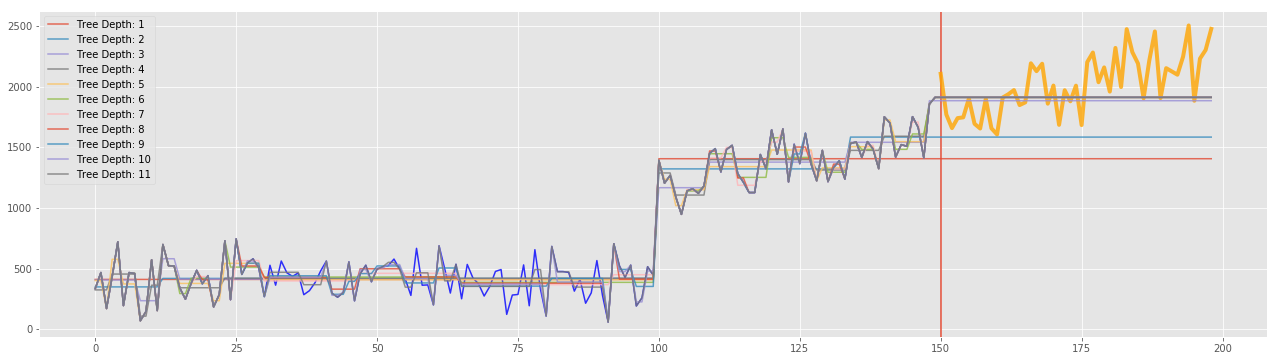

In [68]:
showEffectonTrees()

## Generalized Additive Modelling

In [69]:
url="https://raw.githubusercontent.com/dswah/pyGAM/master/imgs/pygam_basis.png"
Image(url=url)

*** 
Model 2 loglikelihood, RMSE Percent, R2 (-553.4775853127879, 0.1626037252266295, 3408.0984821056804)
*** 
Model 5 loglikelihood, RMSE Percent, R2 (-556.1231783504295, 0.0960101203519556, 3421.594834787072)
*** 
Model 10 loglikelihood, RMSE Percent, R2 (-558.626476544667, 0.08880860081259312, 3435.1213336367578)
*** 
Model 20 loglikelihood, RMSE Percent, R2 (-561.4406519279453, 0.08851841876178816, 3450.761981382437)
*** 
Model 30 loglikelihood, RMSE Percent, R2 (-563.2641690761013, 0.088022968786681, 3461.0907195320005)
*** 
Model 100 loglikelihood, RMSE Percent, R2 (-569.1613765321226, 0.1154467569590658, 3495.08717693275)


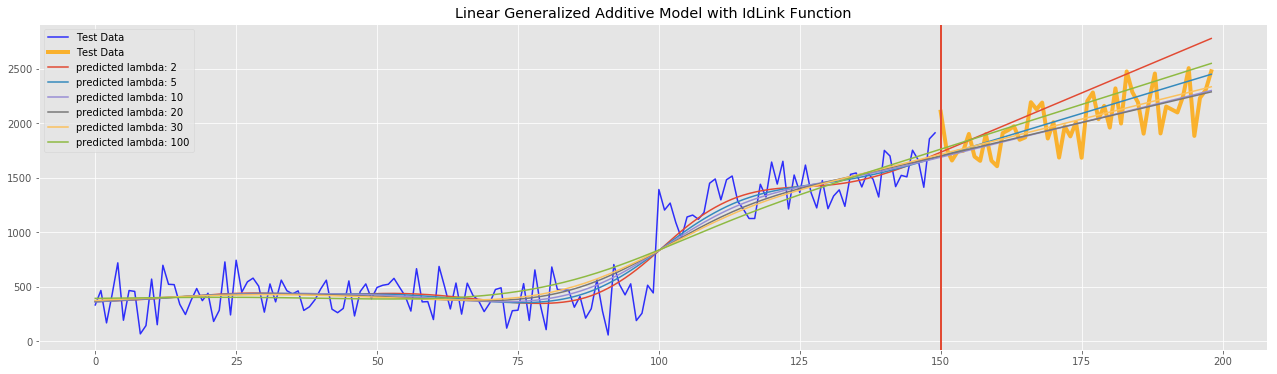

In [70]:
from pygam import LinearGAM
params_dict = {}

plt.figure(figsize=(22,6))
plt.plot(range(len(splineData))[:150],splineData[:150],alpha=0.8, color="blue", label="Test Data")
plt.plot(range(len(splineData))[150:],splineData[150:],alpha=0.8, color="orange", linewidth=4, label="Test Data")
n=1
plt.title("Linear Generalized Additive Model with IdLink Function")
for lam in [2,5,10,20,30,100]:
    plt.axvline(150)
    model = LinearGAM(lam=lam, verbose=True)
    model.fit(X[:150,:],y[:150])
    plt.plot(model.predict(X), linewidth=1.5, label="predicted lambda: %s"%lam)
    
    plt.legend()
    n=+1
    params_dict[lam] = (model.loglikelihood(X[150:,:],y[150:]), 
                        (np.sqrt(mean_squared_error(y[150:], model.predict(X[150:])))/np.mean(y[150:])),
                        model.statistics_["AIC"])

for lam in params_dict:
    print("*** ")
    print("Model %s loglikelihood, RMSE Percent, R2 %s"%(lam, params_dict[lam]))

#model.summary()

*** 
Model 30 loglikelihood, RMSE Percent, R2 (-563.2641690761013, 0.088022968786681, 3461.0907195320005)


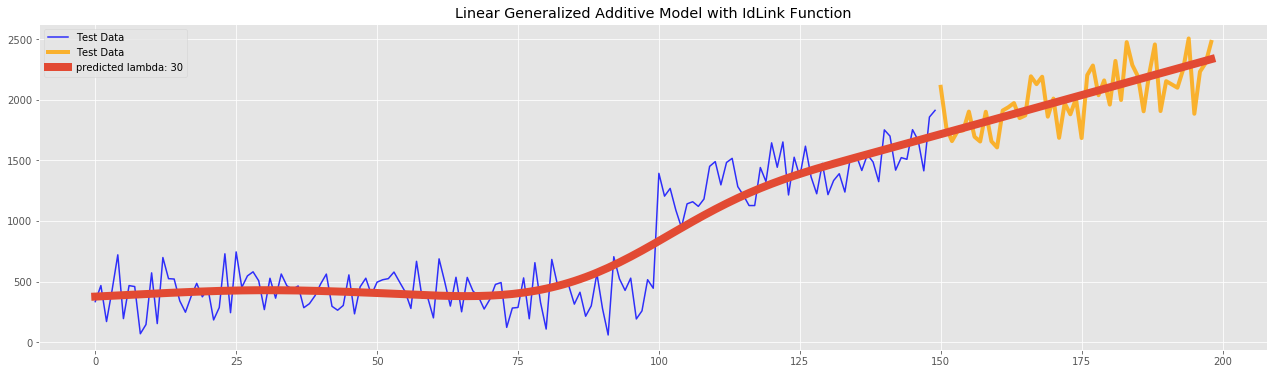

In [71]:
from pygam import LinearGAM
params_dict = {}

plt.figure(figsize=(22,6))
plt.plot(range(len(splineData))[:150],splineData[:150],alpha=0.8, color="blue", label="Test Data")
plt.plot(range(len(splineData))[150:],splineData[150:],alpha=0.8, color="orange", linewidth=4, label="Test Data")
n=1
plt.title("Linear Generalized Additive Model with IdLink Function")
for lam in [30]:
    
    model = LinearGAM(lam=lam, verbose=True)
    model.fit(X[:150,:],y[:150])
    plt.plot(model.predict(X), linewidth=8, label="predicted lambda: %s"%lam)
    
    plt.legend()
    n=+1
    params_dict[lam] = (model.loglikelihood(X[150:,:],y[150:]), 
                        (np.sqrt(mean_squared_error(y[150:], model.predict(X[150:])))/np.mean(y[150:])),
                        model.statistics_["AIC"])

for lam in params_dict:
    print("*** ")
    print("Model %s loglikelihood, RMSE Percent, R2 %s"%(lam, params_dict[lam]))

#model.summary()

# More on info on time series here. For now let's look at a real world model.
https://drive.google.com/file/d/1ub2zNGYuBbPpCEkDR87KiUAaFXfL0EDr/view?usp=sharing